In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from joblib import dump, load
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score
from functions import load_clean_XY

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
X, y, comb_df = load_clean_XY('../data/4910797b-ee55-40a7-8668-10efd5c1b960.csv', '../data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.5, random_state=1)

search_LR = load('./models/search_LR.joblib')

y_train_pred = search_LR.predict(X_train)
y_test_pred = search_LR.predict(X_test)

In [4]:
print(f'Train recall score: {recall_score(y_train, y_train_pred)}')
print(f'Test recall score: {recall_score(y_test, y_test_pred)}')
print(f'Train accuracy score: {accuracy_score(y_train, y_train_pred)}')
print(f'Test accuracy score: {accuracy_score(y_test, y_test_pred)}')

Train recall score: 0.9383718767437534
Test recall score: 0.8380657160570366
Train accuracy score: 0.9035353535353535
Test accuracy score: 0.7920202020202021


In [5]:
params_LR = search_LR.get_params()

In [6]:
params_LR

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocess_LR',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('impute_num',
                                                     SimpleImputer()),
                                                    ('scaler_num',
                                                     StandardScaler())]),
                                    ['amount_tsh', 'gps_height', 'longitude',
                                     'latitude', 'region_code', 'district_code',
                                     'population', 'public_meeting', 'permit']),
                                   ('categorical',
                                    Pipeline(steps=[('impute_cat',
                                                     SimpleImputer(fill_value='None',
                                                                   strategy='constant')),
                                        

In [7]:
best_estimator = search_LR.best_estimator_


In [8]:
coefs_LR = search_LR.best_estimator_.named_steps.model_LR.coef_.tolist()[0]
coefs_LR

[0.056698643007545006,
 0.11690939289757442,
 -0.17204008317969535,
 -0.24016351180101295,
 -0.23901387944658126,
 0.14146123974311225,
 0.14391665718330585,
 0.16186416973942985,
 0.059677007154556976,
 0.38261851612813114,
 -0.3265517289899449,
 0.13095036199280807,
 -0.36521943551542113,
 -0.4578687840799932,
 0.3685226026718488,
 0.38886101822156477,
 0.23879078012598154,
 0.08407752995405184,
 -0.38024949989040574,
 -0.6696484351654063,
 -0.28050244363904114,
 0.8884304873667742,
 0.03054341585912643,
 -0.7934895667084235,
 -0.7888579388773486,
 -0.030820758635276686,
 -0.13444792079937123,
 0.625194944855616,
 -0.013010735072028325,
 -0.3086231560559177,
 0.35968556066339297,
 0.5946250356577288,
 0.5579029363876367,
 0.08364722695388481,
 0.34190899510429346,
 -0.006047057116803386,
 0.22459295459996378,
 0.5145351428576143,
 0.5341778330250099,
 -0.7694904140164468,
 -0.3818385131133488,
 -0.16163648184625135,
 -0.022121822212392138,
 0.37513693760242905,
 0.3192006461678629,
 

In [16]:
cols_LR = list(X.columns)
cols_LR

['amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'quality_group',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type']

In [14]:
len(cols_LR)

29

In [ ]:
dict_coefs_LR = dict(zip(cols_LR, coefs_LR))
dict_coefs_LR

{'amount_tsh': 0.056698643007545006,
 'date_recorded': 0.11690939289757442,
 'funder': -0.17204008317969535,
 'gps_height': -0.24016351180101295,
 'installer': -0.23901387944658126,
 'longitude': 0.14146123974311225,
 'latitude': 0.14391665718330585,
 'wpt_name': 0.16186416973942985,
 'basin': 0.059677007154556976,
 'subvillage': 0.38261851612813114,
 'region': -0.3265517289899449,
 'region_code': 0.13095036199280807,
 'district_code': -0.36521943551542113,
 'lga': -0.4578687840799932,
 'ward': 0.3685226026718488,
 'population': 0.38886101822156477,
 'public_meeting': 0.23879078012598154,
 'recorded_by': 0.08407752995405184,
 'scheme_management': -0.38024949989040574,
 'permit': -0.6696484351654063,
 'extraction_type_class': -0.28050244363904114,
 'management': 0.8884304873667742,
 'management_group': 0.03054341585912643,
 'payment': -0.7934895667084235,
 'quality_group': -0.7888579388773486,
 'quantity': -0.030820758635276686,
 'source_type': -0.13444792079937123,
 'source_class': 0.6

In [ ]:
#comb = X.merge(y)
#comb.head()
comb_df.columns

Index(['status_group', 'needs_repair', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type_class', 'management', 'management_group',
       'payment', 'quality_group', 'quantity', 'source_type', 'source_class',
       'waterpoint_type'],
      dtype='object')

### Management and repair status

In [ ]:
repair_management = comb_df[['needs_repair', 'management']]
repair_management.head()

,needs_repair,management
0,1,vwc
1,1,wug
2,1,vwc
3,0,vwc
4,1,other


In [ ]:
repair_management.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
repair_management.loc[repair_management.needs_repair == 1].management.value_counts()

vwc                 20425
wug                  3906
water board          2170
wua                  1751
private operator     1476
parastatal           1020
other                 505
water authority       446
company               267
unknown               224
trust                  46
other - school         23
Name: management, dtype: int64

In [ ]:
repair_perc_by_management = repair_management.loc[repair_management.needs_repair == 1].management.value_counts() / repair_management.management.value_counts()
repair_perc_by_management.sort_values(ascending=False, inplace=True)
repair_perc_by_management

private operator    0.748858
water board         0.739857
wua                 0.690730
wug                 0.599540
other               0.598341
trust               0.589744
parastatal          0.576923
vwc                 0.504234
water authority     0.493363
unknown             0.399287
company             0.389781
other - school      0.232323
Name: management, dtype: float64

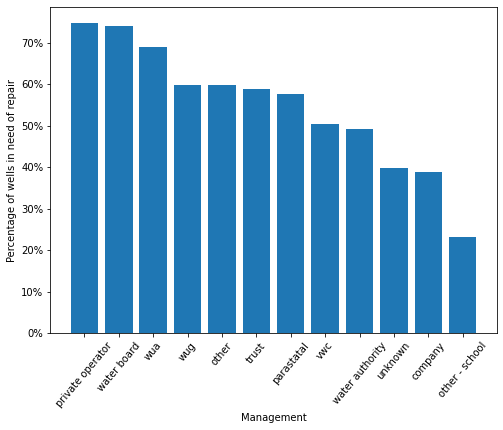

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(repair_perc_by_management.index, repair_perc_by_management.values)
ax.set_xlabel('Management')
ax.set_ylabel('Percentage of wells in need of repair')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xticks(rotation=50);

### Payment and repair

In [ ]:
repair_payment = comb_df[['needs_repair', 'payment']]
repair_payment.head()

,needs_repair,payment
0,1,pay annually
1,1,never pay
2,1,pay per bucket
3,0,never pay
4,1,never pay


In [ ]:
repair_perc_by_payment = repair_payment.loc[repair_payment.needs_repair == 1].payment.value_counts() / repair_payment.payment.value_counts()
repair_perc_by_payment.sort_values(ascending=False, inplace=True)
repair_perc_by_payment

pay annually             0.752334
pay per bucket           0.677796
pay monthly              0.660482
pay when scheme fails    0.620593
other                    0.579696
never pay                0.448911
unknown                  0.432512
Name: payment, dtype: float64

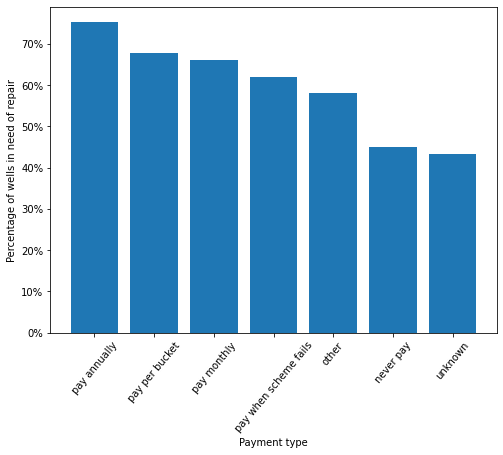

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(repair_perc_by_payment.index, repair_perc_by_payment.values)
ax.set_xlabel('Payment type')
ax.set_ylabel('Percentage of wells in need of repair')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xticks(rotation=50);

### Permit status and repair

In [ ]:
repair_permit = comb_df[['needs_repair', 'permit']]
repair_permit.head()

,needs_repair,permit
0,1,0.0
1,1,1.0
2,1,1.0
3,0,1.0
4,1,1.0


In [ ]:
repair_perc_by_permit = repair_permit.loc[repair_permit.needs_repair == 1].permit.value_counts() / repair_permit.permit.value_counts()
repair_perc_by_permit.sort_values(ascending=False, inplace=True)
repair_perc_by_permit

1.0    0.554437
0.0    0.517094
Name: permit, dtype: float64

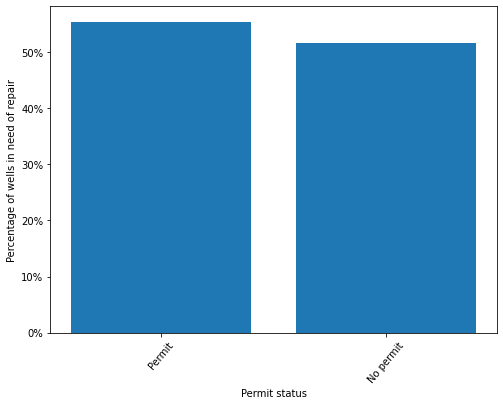

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(repair_perc_by_permit.index.map({0: 'No permit', 1: 'Permit'}), repair_perc_by_permit.values)
ax.set_xlabel('Permit status')
ax.set_ylabel('Percentage of wells in need of repair')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xticks(rotation=50);